In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
notebook_path = os.path.abspath(os.path.join(os.getcwd(), '../notebooks'))
input_file_path = rf'{notebook_path}\data\processed'

In [ ]:
# Step 1: Loading the Data
year = "2023"
ccy = "gbpusd"
file_path = rf'{input_file_path}/{year}_{ccy}_tick_prev_price_as_base.csv'

# Load the dataset
df = pd.read_csv(file_path)
df["datetime"] = pd.to_datetime(df["datetime"])

# Step 2: Feature Engineering
# Create lagged features
lags = [1, 2, 3]
for lag in lags:
    df[f'lag_{lag}'] = df['price'].shift(lag)

# Include `ticks_moved` as a feature
df['ticks_moved_lag_1'] = df['ticks_moved'].shift(1)  # Add lagged `ticks_moved`

# Fill missing values (introduced by lags)
df.dropna(inplace=True)

# Step 3: Define Features and Target
features = [col for col in df.columns if col.startswith('lag') or 'ticks_moved' in col]
df['target'] = (df['directions'] > 0).astype(int)  # Binary target: 1 for up, 0 for down
""""
The purpose of this line is to create a binary target variable that represents two possible outcomes for each row in the data:

1 (Up): If the value in the directions column is positive, implying the price or movement is upward.
0 (Down): If the value in the directions column is zero or negative, implying the price or movement is flat or downward.
This target column will then be used as the dependent variable (label) for a machine learning model, such as a Random Forest Classifier, to predict future price movements.

1. Expression: df['directions'] > 0
This part checks whether the value in the column directions is greater than 0 for each row in the DataFrame.
The result of this operation is a Boolean Series (True or False) where:
True if the value of directions is greater than 0.
False if the value of directions is less than or equal to 0.
2. Method: .astype(int)
The .astype(int) method converts the Boolean values (True and False) into integers:
True becomes 1
False becomes 0
This conversion is done because most machine learning algorithms work with numerical data, and a binary classification target is typically represented as 0 or 1.
3. Assignment: df['target'] = ...
The result of the Boolean expression (df['directions'] > 0) and its conversion to integers (astype(int)) is assigned to a new column named target in the DataFrame df.

"""
X = df[features]
y = df['target']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, shuffle=False)

# Step 5: Train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

"""""
1. RandomForestClassifier
The RandomForestClassifier is a machine learning model provided by the scikit-learn library. It is used for classification tasks, and it is based on the Random Forest algorithm. The Random Forest algorithm works by:

Creating multiple decision trees during the training phase.
Combining their outputs (e.g., majority voting) to make the final prediction.
This ensemble method reduces overfitting and increases accuracy compared to a single decision tree.

2. random_state=42
Purpose: The random_state parameter is used to control the randomness in the model's training process.
Why Set It?:
The Random Forest model has random components (e.g., choosing subsets of data and features for building decision trees).
By setting random_state=42, you make the results reproducible—i.e., running the code multiple times will produce the same model and predictions. (The choice of 42 is arbitrary; any integer can be used.)
If random_state is not specified, the results may vary between runs due to randomness.

3. Initialization Only
At this step, the RandomForestClassifier model is only being initialized. The model parameters (e.g., number of trees, max depth, etc.) are being set to their default values, except for the random_state.
The model has not yet been trained or fitted to the data. Training happens later when the fit method is called (e.g., rf_model.fit(X_train, y_train)).

"""""

# Step 6: Evaluate Model
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_text = classification_report(y_test, y_pred)

# Display Results
results = {
    "Accuracy": accuracy,
    "Confusion Matrix": conf_matrix,
    "Classification Report": classification_report_text
}

# Output results
results


{'Accuracy': 0.5175498967653132,
 'Confusion Matrix': array([[341, 363],
        [338, 411]]),
 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.50      0.48      0.49       704\n           1       0.53      0.55      0.54       749\n\n    accuracy                           0.52      1453\n   macro avg       0.52      0.52      0.52      1453\nweighted avg       0.52      0.52      0.52      1453\n'}

In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Step 1: Loading the Data
year = "2023"
ccy = "gbpusd"
file_path = rf'{input_file_path}/{year}_{ccy}_tick_prev_price_as_base_friday_removed.csv'

# Load the dataset
df = pd.read_csv(file_path)
df["datetime"] = pd.to_datetime(df["datetime"])

# Step 2: Feature Engineering
# Create lagged features
lags = [1, 2, 3]
for lag in lags:
    df[f'lag_{lag}'] = df['price'].shift(lag)

# Include `ticks_moved` as a feature
df['ticks_moved_lag_1'] = df['ticks_moved'].shift(1)  # Add lagged `ticks_moved`

# Fill missing values (introduced by lags)
df.dropna(inplace=True)

# Step 3: Define Features and Target
features = [col for col in df.columns if col.startswith('lag') or 'ticks_moved' in col]
df['target'] = (df['directions'] > 0).astype(int)  # Binary target: 1 for up, 0 for down
""""
The purpose of this line is to create a binary target variable that represents two possible outcomes for each row in the data:

1 (Up): If the value in the directions column is positive, implying the price or movement is upward.
0 (Down): If the value in the directions column is zero or negative, implying the price or movement is flat or downward.
This target column will then be used as the dependent variable (label) for a machine learning model, such as a Random Forest Classifier, to predict future price movements.

1. Expression: df['directions'] > 0
This part checks whether the value in the column directions is greater than 0 for each row in the DataFrame.
The result of this operation is a Boolean Series (True or False) where:
True if the value of directions is greater than 0.
False if the value of directions is less than or equal to 0.
2. Method: .astype(int)
The .astype(int) method converts the Boolean values (True and False) into integers:
True becomes 1
False becomes 0
This conversion is done because most machine learning algorithms work with numerical data, and a binary classification target is typically represented as 0 or 1.
3. Assignment: df['target'] = ...
The result of the Boolean expression (df['directions'] > 0) and its conversion to integers (astype(int)) is assigned to a new column named target in the DataFrame df.

"""
X = df[features] 
y = df['target']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, shuffle=False)

# Step 5: Train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Step 6: Evaluate Model
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_text = classification_report(y_test, y_pred)

# Display Results
results = {
    "Accuracy": accuracy,
    "Confusion Matrix": conf_matrix,
    "Classification Report": classification_report_text
}

# Output results
results


{'Accuracy': 0.5172413793103449,
 'Confusion Matrix': array([[308, 276],
        [298, 307]]),
 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.51      0.53      0.52       584\n           1       0.53      0.51      0.52       605\n\n    accuracy                           0.52      1189\n   macro avg       0.52      0.52      0.52      1189\nweighted avg       0.52      0.52      0.52      1189\n'}

Backtesting

Parameters:

initial_balance: The starting capital for the backtest.
lot_size: The size of each trade (in units of the currency).
Logic:

A trade is placed based on the model's prediction:
If the model predicts "up" (1), we simulate a buy.
If the model predicts "down" (0), we simulate a sell.
Profit or loss is calculated based on whether the model's prediction aligns with the actual movement (y_test).
Trade Profit Calculation:

price * 0.0001 * lot_size is a simple approximation for pip movement profit/loss.
This assumes 1 pip = 0.0001 for most currency pairs (adjust as needed).
Outputs:

balance_history: The account balance over time.
trade_log: Detailed log of each trade, including tick, price, predicted and actual direction, profit, and updated balance.


In [4]:
def run_backtest(df, X_test, y_test, y_pred, initial_balance=10000, lot_size=1000):
    """
    Run a simple backtest using model predictions.

    Parameters:
    - df: DataFrame, the original data with features and target.
    - X_test: array, the test feature set. Provides the inputs for the model to generate predictions; indirectly referenced for metadata.
    - y_test: array, the actual target values for the test set. Used to evaluate whether the model's predictions (y_pred) are correct or not.
    - y_pred: array, the predicted target values for the test set. Drives the simulated trades and determines the backtesting outcomes.
    - initial_balance: float, the starting capital for backtesting.
    - lot_size: float, the trade size in units.

    Returns:
    - balance_history: list of balances over time.
    - trade_log: list of trades with details.
    """
    # Initialize variables
    balance = initial_balance
    balance_history = [balance]
    trade_log = []

    for i in range(len(y_pred)):
        actual = y_test.iloc[i]
        predicted = y_pred[i]
        price = df.iloc[len(df) - len(X_test) + i]['price']  # Match test index to df
        
        # Simulate a trade based on predicted direction
        if predicted == 1:  # Buy signal
            trade_profit = (price * 0.0001 * lot_size) if actual == 1 else -(price * 0.0001 * lot_size)
        else:  # Sell signal
            trade_profit = -(price * 0.0001 * lot_size) if actual == 1 else (price * 0.0001 * lot_size)

        # Update balance
        balance += trade_profit
        balance_history.append(balance)

        # Log trade
        trade_log.append({
            'tick': df.iloc[len(df) - len(X_test) + i]['tick_number'],
            'price': price,
            'predicted': predicted,
            'actual': actual,
            'profit': trade_profit,
            'balance': balance
        })

    return balance_history, trade_log


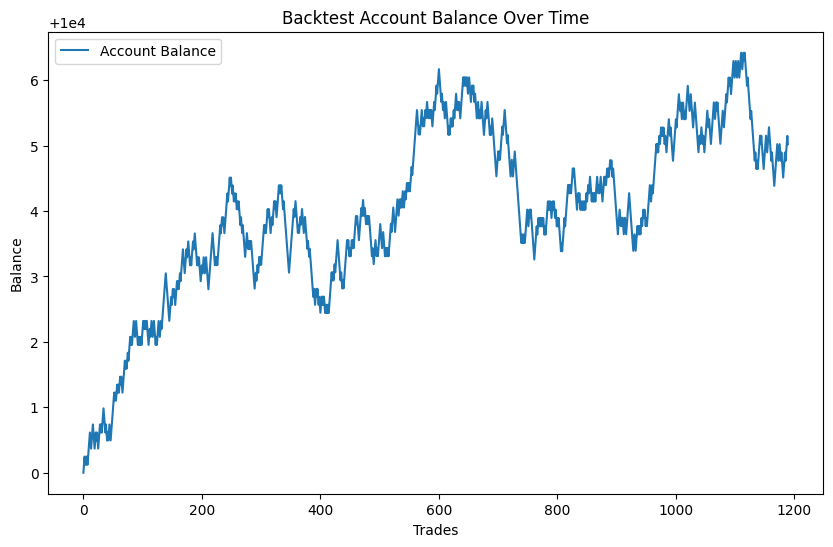

Test set size: 1189
      tick    price  predicted  actual    profit       balance
0     5766  1.22915          1       1  0.122915  10000.122915
1     5767  1.23015          1       1  0.123015  10000.245930
2     5768  1.22915          1       0 -0.122915  10000.123015
3     5769  1.22815          0       0  0.122815  10000.245830
4     5770  1.22915          0       1 -0.122915  10000.122915
...    ...      ...        ...     ...       ...           ...
1184  7222  1.27415          0       1 -0.127415  10004.766085
1185  7223  1.27315          0       0  0.127315  10004.893400
1186  7224  1.27215          0       0  0.127215  10005.020615
1187  7225  1.27315          1       1  0.127315  10005.147930
1188  7226  1.27415          0       1 -0.127415  10005.020515

[1189 rows x 6 columns]


In [5]:
# Run backtest
balance_history, trade_log = run_backtest(df, X_test, y_test, y_pred)

# Convert trade_log to a DataFrame for easier analysis
trade_log_df = pd.DataFrame(trade_log)

# Plot balance history
plt.figure(figsize=(10, 6))
plt.plot(balance_history, label='Account Balance')
plt.title('Backtest Account Balance Over Time')
plt.xlabel('Trades')
plt.ylabel('Balance')
plt.legend()
plt.show()

print(f"Test set size: {len(X_test)}")

# Display trade log
print(trade_log_df)

